# Install Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Overview

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s6e2/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s6e2/test.csv')
#sub = pd.read_csv('/kaggle/input/playground-series-s6e2/sample_submission.csv')

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Compute values that are constant across columns
    total_rows = len(df)
    duplicates = df.duplicated().sum()

    # Use vectorized operations 
    dtypes = df.dtypes
    instances = df.count()
    unique = df.nunique()
    sum_null = df.isnull().sum()
    #null_percentage = (df.isnull().sum() / total_rows * 100).round(2)

    # Create the summary 
    df_check = pd.DataFrame({
        #'column': df.columns,
        'dtype': dtypes,
        'instances': instances,
        'unique': unique,
        'sum_null': sum_null,
        #'null_percentage': null_percentage,
        'duplicates': duplicates  
    })

    return df_check

print("Train Data")
display(check(train))
display(train.head())

print("Test Data")
display(check(test))
display(test.head())

Train Data


,dtype,instances,unique,sum_null,duplicates
id,int64,630000,630000,0,0
Age,int64,630000,42,0,0
Sex,int64,630000,2,0,0
Chest pain type,int64,630000,4,0,0
BP,int64,630000,66,0,0
Cholesterol,int64,630000,150,0,0
FBS over 120,int64,630000,2,0,0
EKG results,int64,630000,3,0,0
Max HR,int64,630000,93,0,0
Exercise angina,int64,630000,2,0,0


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


Test Data


,dtype,instances,unique,sum_null,duplicates
id,int64,270000,270000,0,0
Age,int64,270000,43,0,0
Sex,int64,270000,2,0,0
Chest pain type,int64,270000,4,0,0
BP,int64,270000,64,0,0
Cholesterol,int64,270000,145,0,0
FBS over 120,int64,270000,2,0,0
EKG results,int64,270000,3,0,0
Max HR,int64,270000,92,0,0
Exercise angina,int64,270000,2,0,0


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7


# Visual Insights

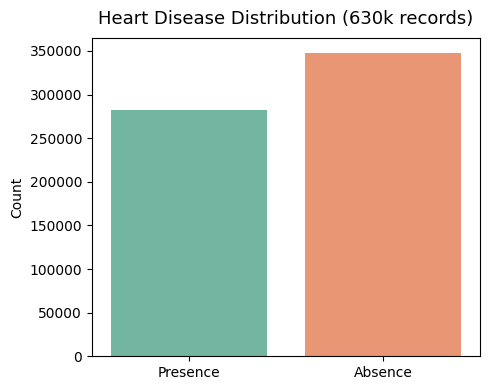

Heart Disease
Absence     55.2
Presence    44.8
Name: proportion, dtype: float64


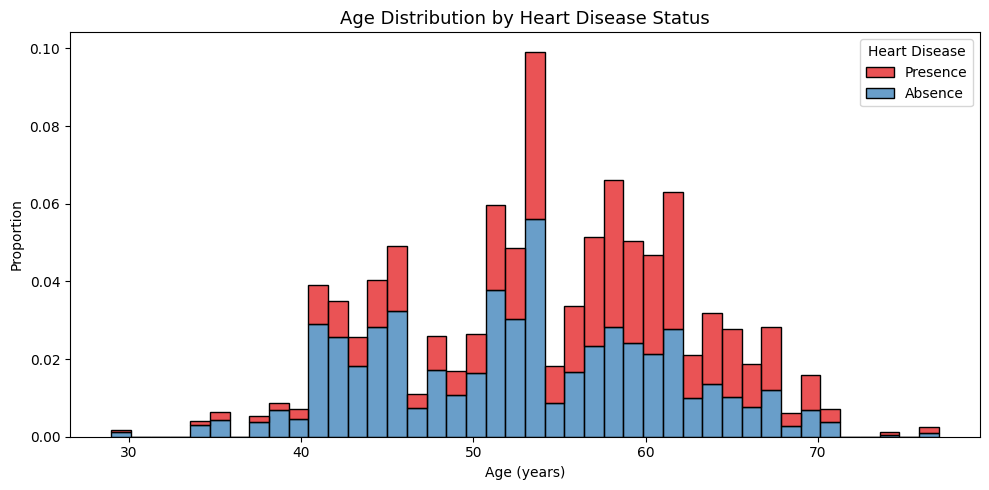

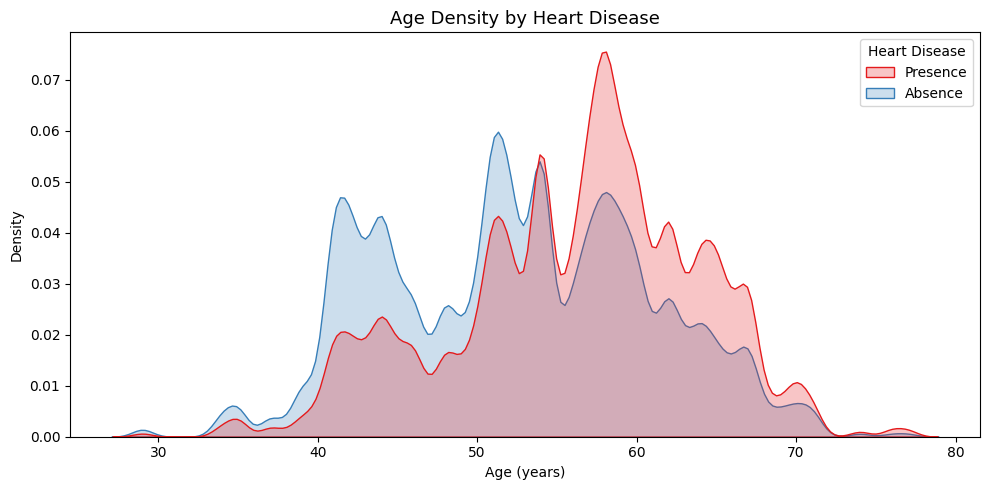

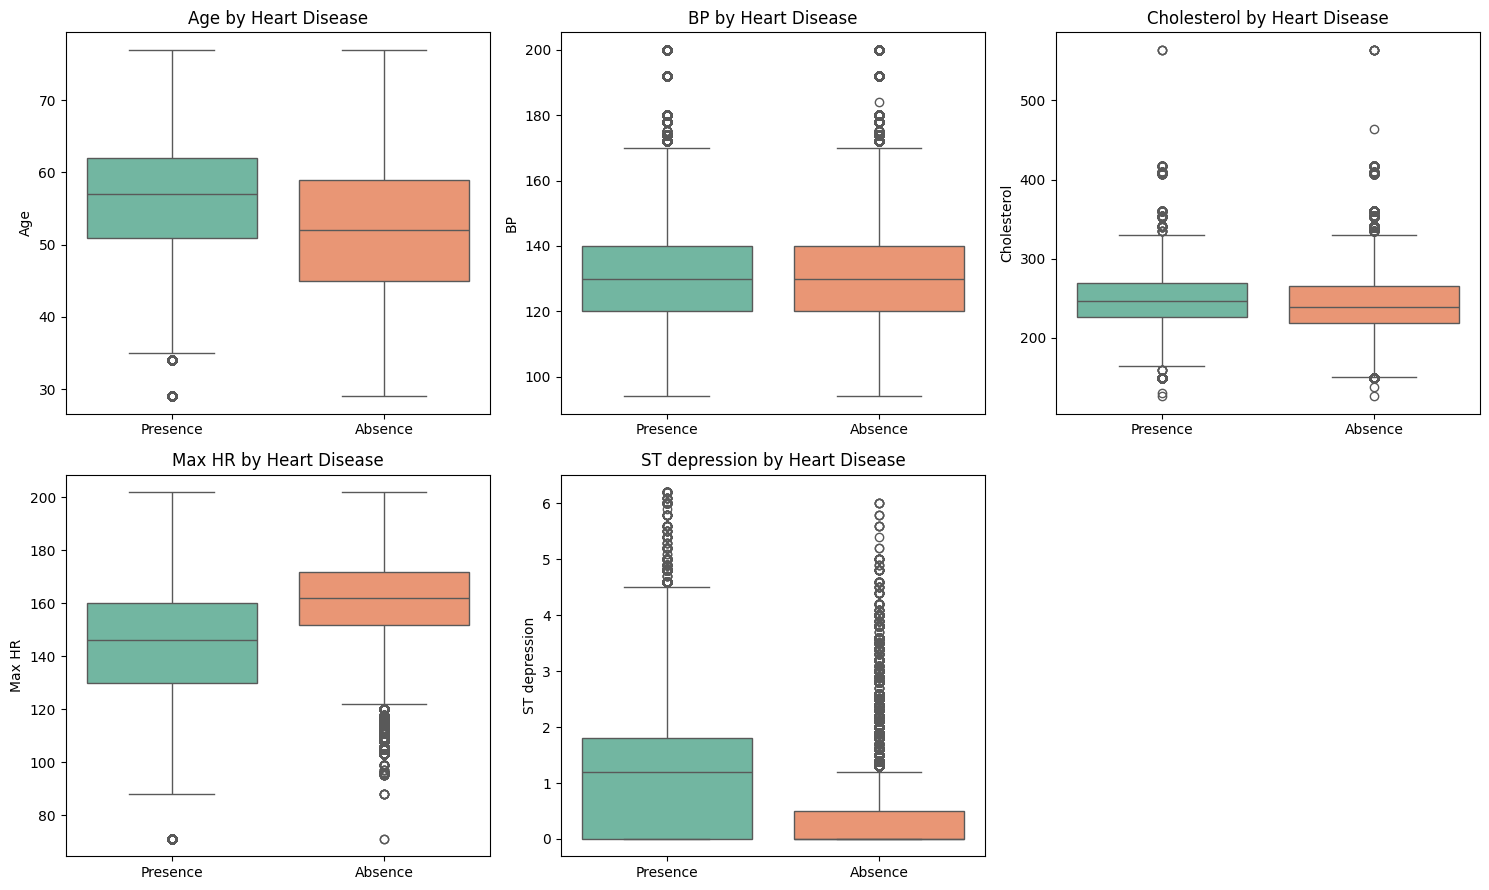

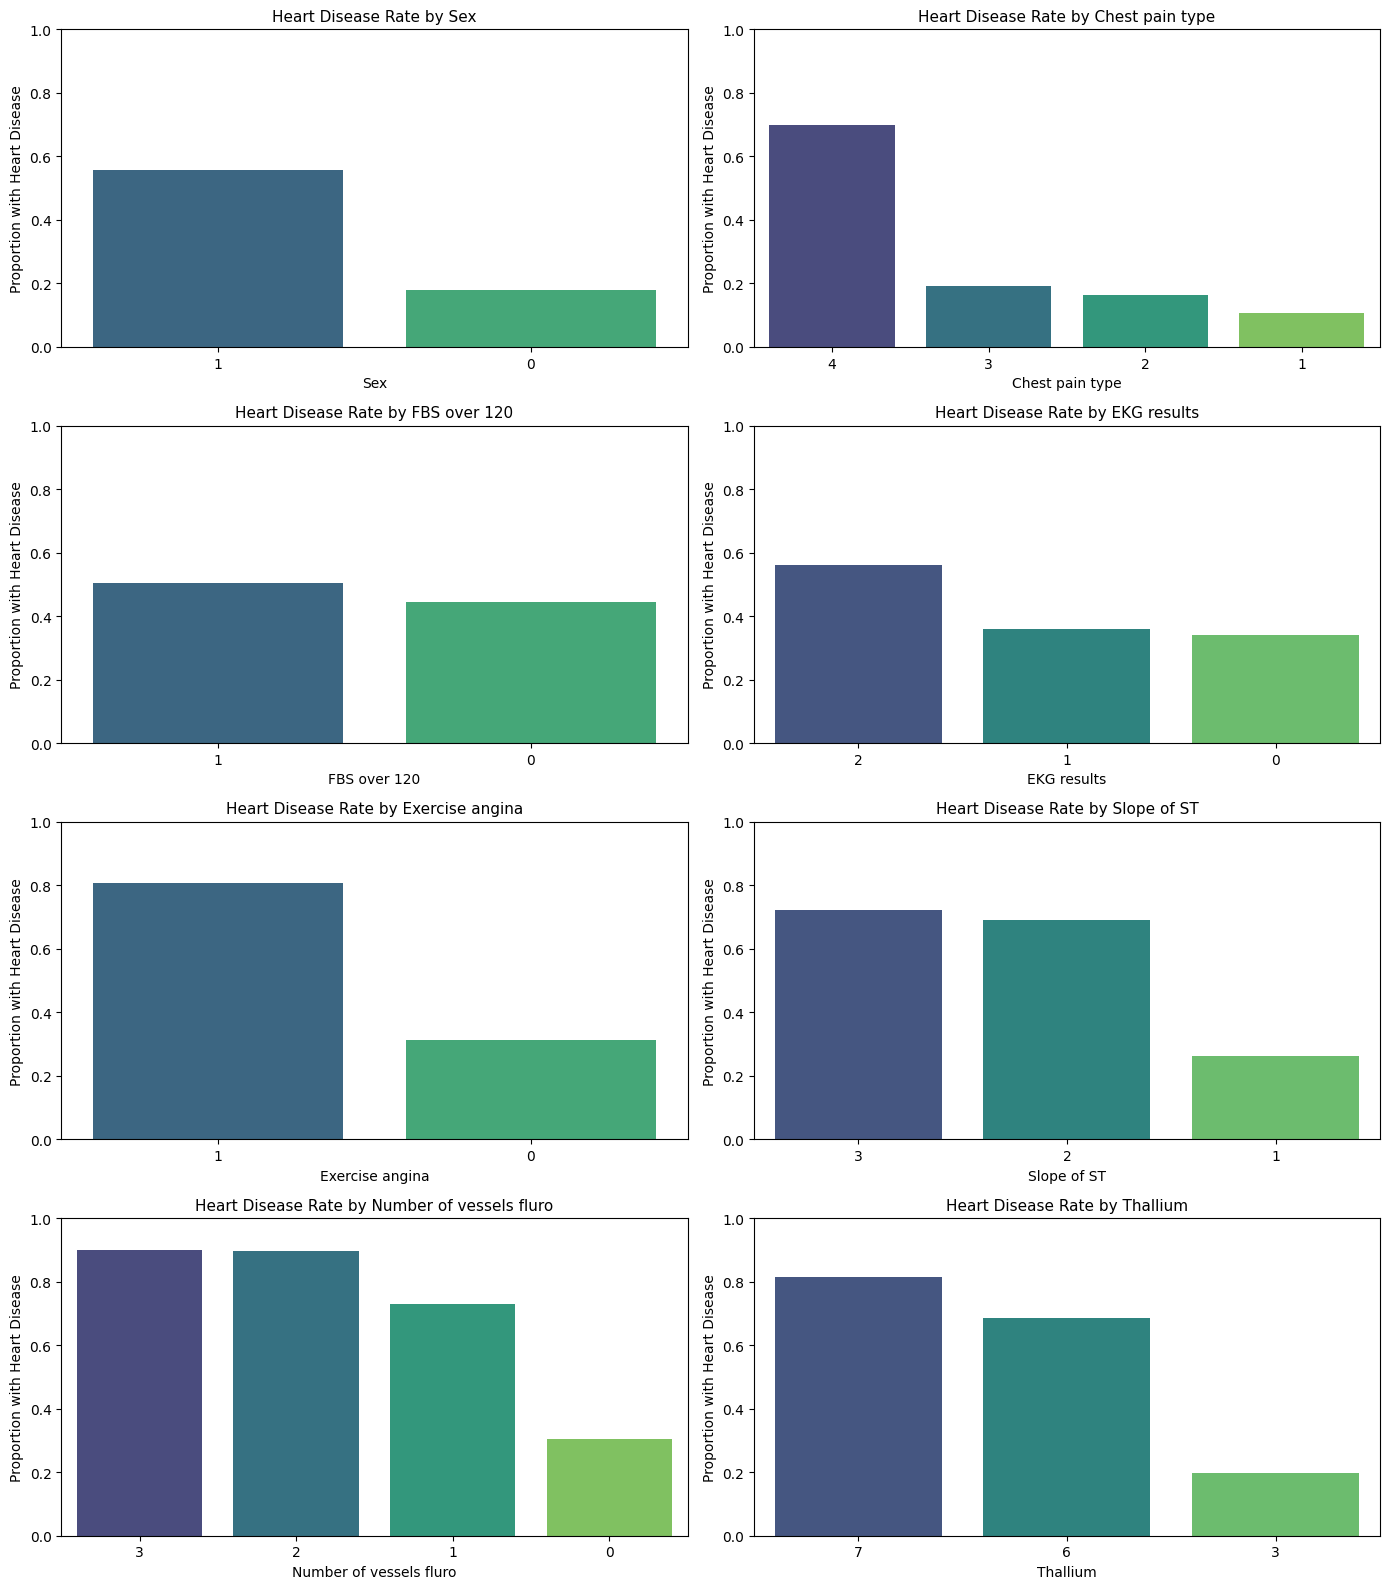

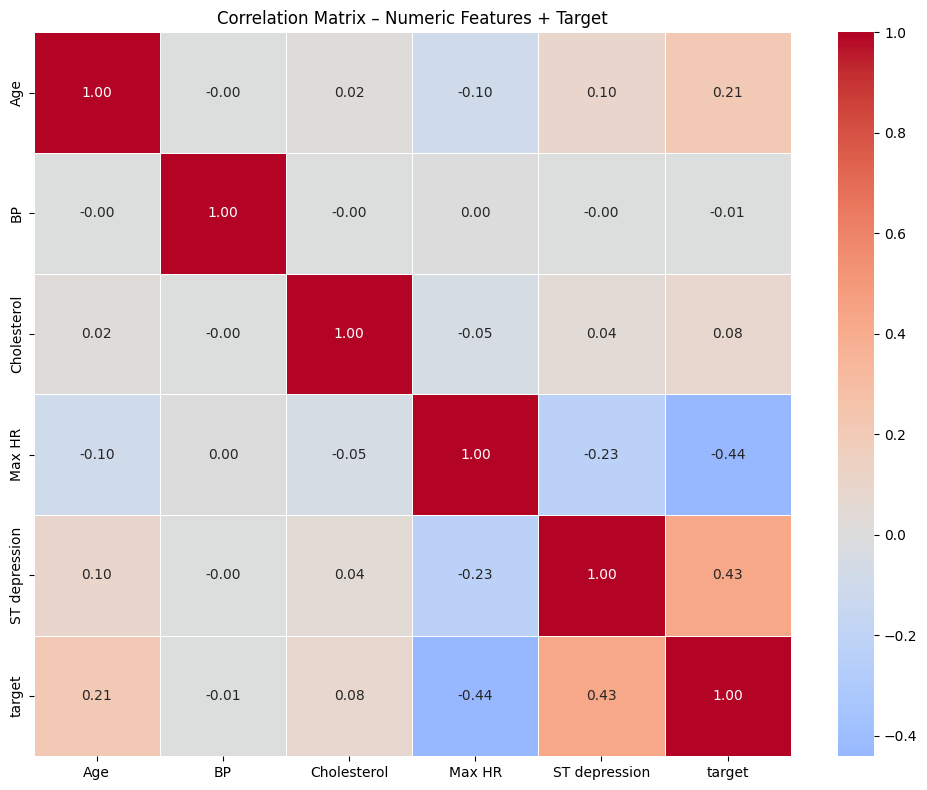

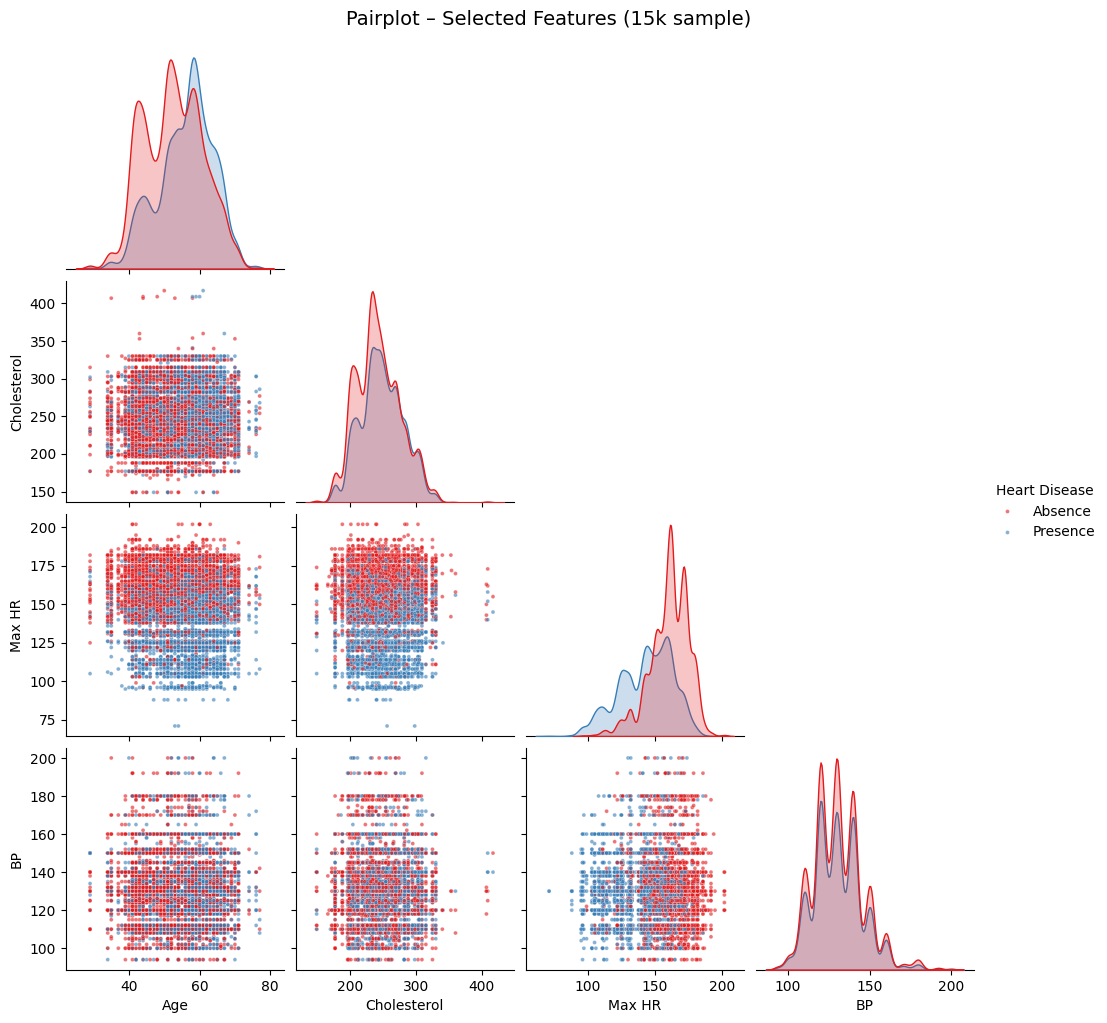

In [4]:
# Prep for mapping
df = train
df["Heart Disease"] = df["Heart Disease"].astype(str).str.strip()
df["target"] = df["Heart Disease"].map({"Presence": 1, "Absence": 0}).astype("Int8")

# ─────────────────────
# Target distribution
# ─────────────────────
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="Heart Disease", hue="Heart Disease", palette="Set2", legend=False)
plt.title("Heart Disease Distribution (630k records)", fontsize=13, pad=10)
plt.xlabel(""); plt.ylabel("Count")
plt.tight_layout()
plt.show()

print(df["Heart Disease"].value_counts(normalize=True).round(3) * 100)

# ─────────────────────────
# Age vs Heart Disease 
# ─────────────────────────
plt.figure(figsize=(10, 5))

sns.histplot(
    data=df,
    x="Age",
    hue="Heart Disease",
    multiple="stack",
    bins=42,
    palette="Set1",
    stat="proportion"
)
plt.title("Age Distribution by Heart Disease Status", fontsize=13)
plt.xlabel("Age (years)")
plt.tight_layout()
plt.show()

# smoothed KDE version
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="Age", hue="Heart Disease", fill=True, common_norm=False, palette="Set1")
plt.title("Age Density by Heart Disease", fontsize=13)
plt.xlabel("Age (years)")
plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────
# Numerical features vs target – box + violin
# ────────────────────────────────────────────────
num_cols = ["Age", "BP", "Cholesterol", "Max HR", "ST depression"]

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flat

for i, col in enumerate(num_cols):
    sns.boxplot(
        data=df,
        x="Heart Disease",
        y=col,
        hue="Heart Disease",
        palette="Set2",
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Heart Disease")
    axes[i].set_xlabel("")

# Hide empty subplot if any
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────
# Categorical features – bar plots with target rate
# ────────────────────────────────────────────────
cat_cols = [
    "Sex", "Chest pain type", "FBS over 120", "EKG results",
    "Exercise angina", "Slope of ST", "Number of vessels fluro", "Thallium"
]

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    # Proportion of heart disease within each category
    prop = df.groupby(col)["target"].mean().sort_values(ascending=False)
    
    sns.barplot(
        x=prop.index.astype(str),
        y=prop.values,
        palette="viridis",
        ax=axes[i]
    )
    axes[i].set_title(f"Heart Disease Rate by {col}", fontsize=11)
    axes[i].set_ylabel("Proportion with Heart Disease")
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=30 if len(prop) > 5 else 0)

plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────
# Correlation heatmap (numeric features only)
# ────────────────────────────────────────────────
plt.figure(figsize=(10, 8))
corr = df[num_cols + ["target"]].corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix – Numeric Features + Target")
plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────
# Pairplot – selected important features (sample if too slow)
# ────────────────────────────────────────────────
sample_df = df.sample(15000, random_state=42)  # adjust size if needed

sns.pairplot(
    sample_df,
    vars=["Age", "Cholesterol", "Max HR", "BP"],
    hue="Heart Disease",
    palette="Set1",
    corner=True,
    plot_kws={"s": 8, "alpha": 0.6}
)
plt.suptitle("Pairplot – Selected Features (15k sample)", y=1.02, fontsize=14)
plt.show()

# Clean and Prep

In [5]:
# ────────────────────────────────────────────────
# Type conversion & encoding
# ────────────────────────────────────────────────

RENAME_COLS = {
    'Chest pain type': 'chest_pain_type',
    'FBS over 120': 'fbs_over_120',
    'EKG results': 'ekg_results',
    'Max HR': 'max_hr',
    'Exercise angina': 'exang',
    'ST depression': 'st_depression',
    'Slope of ST': 'slope',
    'Number of vessels fluro': 'num_of_vessels_fl',
    'Thallium': 'thal',
    'Heart Disease': 'Heart_Disease_original'
}

CATEGORICAL_COLS = [
    'Sex', 'chest_pain_type', 'fbs_over_120', 'ekg_results',
    'exang', 'slope', 'num_of_vessels_fl', 'thal'
]

NUMERICAL_COLS = [
    'Age', 'BP', 'Cholesterol', 'max_hr', 'st_depression'
]


def preprocess_heart_data(
    df: pd.DataFrame,
    is_train: bool,
    keep_id: bool = False
):
    df = df.copy()

    # Rename columns
    df.rename(columns=RENAME_COLS, inplace=True)

    # Preserve test id for submission
    test_id = None
    if not is_train and keep_id and 'id' in df.columns:
        test_id = df['id'].copy()

    # Target handling (train only)
    if is_train and 'Heart_Disease_original' in df.columns:
        target_map = {'Presence': 1, 'Absence': 0}
        df['target'] = (
            df['Heart_Disease_original']
            .map(target_map)
            .astype('int8')
        )

        if df['target'].isna().any():
            raise ValueError(
                f"Unmapped target values: "
                f"{df['Heart_Disease_original'].unique()}"
            )

    # Drop target source + id
    df.drop(
        columns=['Heart_Disease_original', 'id'],
        inplace=True,
        errors='ignore'
    )

    # Type casting
    for col in CATEGORICAL_COLS:
        if col in df.columns:
            df[col] = df[col].astype('category')

    for col in NUMERICAL_COLS:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    if is_train:
        print(f"Missing values after preprocessing: {df.isna().sum().sum()}")
        print(
            "Target distribution:\n",
            df['target'].value_counts(normalize=True).round(3)
        )

    return df, test_id


In [6]:
train, _ = preprocess_heart_data(
    train,
    is_train=True
)

test, test_id = preprocess_heart_data(
    test,
    is_train=False,
    keep_id=True   #for submission later
)

Missing values after preprocessing: 0
Target distribution:
 target
0    0.552
1    0.448
Name: proportion, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split

X = train.drop(columns='target')
y = train['target']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.15,
    stratify=y,
    random_state=42
)

print(
    f"Train: {len(X_train):,} | "
    f"Valid: {len(X_valid):,} | "
    f"Test: {len(test):,}"
)


Train: 535,500 | Valid: 94,500 | Test: 270,000


# Model and Evaluation

In [8]:
import lightgbm as lgb

categorical_cols = [
    c for c in X.columns
    if X[c].dtype.name == 'category'
]

train_data = lgb.Dataset(
    X_train,
    label=y_train,
    categorical_feature=categorical_cols
)

valid_data = lgb.Dataset(
    X_valid,
    label=y_valid,
    categorical_feature=categorical_cols,
    reference=train_data
)


In [9]:
params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.035,
    'num_leaves': 31,
    'max_depth': 8,
    'min_data_in_leaf': 40,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.80,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'is_unbalance': True,
    'random_state': 42,
    'n_jobs': -1,
    'verbose': -1
}

model = lgb.train(
    params,
    train_data,
    num_boost_round=1500,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=80),
        lgb.log_evaluation(50)
    ]
)

Training until validation scores don't improve for 80 rounds
[50]	train's auc: 0.950164	valid's auc: 0.951012
[100]	train's auc: 0.953058	valid's auc: 0.953805
[150]	train's auc: 0.954241	valid's auc: 0.954892
[200]	train's auc: 0.954768	valid's auc: 0.955284
[250]	train's auc: 0.9552	valid's auc: 0.95561
[300]	train's auc: 0.955563	valid's auc: 0.955872
[350]	train's auc: 0.955839	valid's auc: 0.95603
[400]	train's auc: 0.956068	valid's auc: 0.956117
[450]	train's auc: 0.956284	valid's auc: 0.956206
[500]	train's auc: 0.956445	valid's auc: 0.956222
[550]	train's auc: 0.956607	valid's auc: 0.956261
[600]	train's auc: 0.956755	valid's auc: 0.956278
[650]	train's auc: 0.956898	valid's auc: 0.95629
[700]	train's auc: 0.957033	valid's auc: 0.956295
[750]	train's auc: 0.957165	valid's auc: 0.956304
[800]	train's auc: 0.957305	valid's auc: 0.956302
Early stopping, best iteration is:
[764]	train's auc: 0.957202	valid's auc: 0.956305


In [10]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score,
    precision_score, recall_score, f1_score
)

y_valid_proba = model.predict(X_valid)
y_valid_pred = (y_valid_proba >= 0.5).astype(int)

print("\nValidation Metrics")
print(f"AUC       : {roc_auc_score(y_valid, y_valid_proba):.4f}")
print(f"Accuracy  : {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f"Precision : {precision_score(y_valid, y_valid_pred):.4f}")
print(f"Recall    : {recall_score(y_valid, y_valid_pred):.4f}")
print(f"F1        : {f1_score(y_valid, y_valid_pred):.4f}")



Validation Metrics
AUC       : 0.9563
Accuracy  : 0.8906
Precision : 0.8713
Recall    : 0.8870
F1        : 0.8791


# Test and Submission

In [11]:
# ────────────────────────────────────────────────
# Predict on test set 
# ────────────────────────────────────────────────

test_proba = model.predict(test)
test_pred = (test_proba >= 0.5).astype(int)

submission = pd.DataFrame({
    'id': test_id,          
    'heart_disease': test_pred
})

submission.to_csv('submission.csv', index=False)
submission.head()

,id,heart_disease
0,630000,1
1,630001,0
2,630002,1
3,630003,0
4,630004,0
